<a href="https://colab.research.google.com/github/Deeksha0209/Superstore-Dataset/blob/main/Superstore_DS_Week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OBJECTIVE -- Data Cleaning and EDA on Superstore Dataset.**

In [ ]:
#Let's start with importing the required libraries. Seaborn & matplotlib are used for data visualizations.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#Next step is loading the csv file in a dataframe using pandas.
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')

**#A Peek into the Dataset**

In [ ]:
#Let's have a look at the original no of rows and columns!
df.shape

(9800, 18)

In [ ]:
#Listing out the first few entries
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
#Let's take a random sample and check out the results!
df.sample(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
7080,7081,CA-2017-106950,02/09/2017,06/09/2017,Standard Class,JE-15715,Joe Elijah,Consumer,United States,Charlotte,North Carolina,28205.0,South,FUR-TA-10001768,Furniture,Tables,Hon Racetrack Conference Tables,472.518
3262,3263,CA-2015-140662,17/11/2015,19/11/2015,First Class,TS-21205,Thomas Seio,Corporate,United States,San Francisco,California,94109.0,West,OFF-PA-10003395,Office Supplies,Paper,Xerox 1941,733.950
6901,6902,US-2018-135013,24/07/2018,24/07/2018,Same Day,HR-14830,Harold Ryan,Corporate,United States,Huntington Beach,California,92646.0,West,TEC-CO-10001449,Technology,Copiers,Hewlett Packard LaserJet 3310 Copier,2399.960


In [ ]:
#df.info() gives us an information about the columns. Let's check it out.
df.info()
#As displayed, we can get an idea about the data types and non null count for each columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
#df.describe() provides a statistical summary of the data which includ count, min, max, std and quartiles for numerical columns
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [ ]:
#Let's take a scan of all the columns in the dataset.
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

# #Description of Dataset -

 **This is a dataset for a Super Store sprawled over various columns. Starting with Row ID, this column lists the id for each row of data. Order ID lists the id for each order. We have 2 columns - Order Date & Ship Date which give us the information about the dates when the orders were placed and when the orders were shipped respectively. We have a column Ship Mode which lists the mode of shipping for the orders.Next we cover the details about the customers in Customer ID & Customer Name columns. Next column is Segments that provide us information about the various strata of Customers. In the next few columns we cover the address details of the customer that include Country, City, State, Postal Code & Region.Following this we focus on products information that include Product ID, Category & Sub-Category of the products, Product Name and finaly the Sales wrt to each data point.**

# **Let's begin the Data Cleaning Process!**

In [ ]:
#Let's first list out all the null/missing values for the columns!
df.isnull().sum()

#Looks like only 1 column has null values. Great!

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [ ]:
#Let's chk the na values in Postal Code column
na_values = df[df['Postal Code'].isna()]
na_values

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [ ]:
#As we can see, postal code is missing for the same state and city - hence we can just cross-chk from google and assign the correct value for postal code. Using 0o for octal representation in python.
df.loc[df['State'] == 'Vermont', 'Postal Code'] = 0o5401

In [ ]:
#now, let's recheck our na values - should be 0 for all.
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [ ]:
#we must reset the index for the dataset for getting a smooth dataset.
df.reset_index(drop = True, inplace = True)

In [ ]:
#Now let's check and drop duplicate values, if any.
df=df.drop_duplicates()
df.duplicated().sum()

0

In [ ]:
#df.value_counts() is used to display the values in each column.
df.value_counts()

Row ID  Order ID        Order Date  Ship Date   Ship Mode       Customer ID  Customer Name     Segment      Country        City         State         Postal Code  Region   Product ID       Category         Sub-Category  Product Name                                         Sales  
1       CA-2017-152156  08/11/2017  11/11/2017  Second Class    CG-12520     Claire Gute       Consumer     United States  Henderson    Kentucky      42420.0      South    FUR-BO-10001798  Furniture        Bookcases     Bush Somerset Collection Bookcase                    261.960    1
6537    CA-2015-169684  20/10/2015  23/10/2015  First Class     FH-14365     Fred Hopkins      Corporate    United States  Knoxville    Tennessee     37918.0      South    FUR-TA-10003008  Furniture        Tables        Lesro Round Back Collection Coffee Table, End Table  328.590    1
6530    CA-2015-103744  23/02/2015  27/02/2015  Standard Class  MG-17875     Michael Grace     Home Office  United States  El Paso      Texas      

In [ ]:
#Let me just check the first data entry for the columns!
df.iloc[0]

Row ID                                           1
Order ID                            CA-2017-152156
Order Date                              08/11/2017
Ship Date                               11/11/2017
Ship Mode                             Second Class
Customer ID                               CG-12520
Customer Name                          Claire Gute
Segment                                   Consumer
Country                              United States
City                                     Henderson
State                                     Kentucky
Postal Code                                42420.0
Region                                       South
Product ID                         FUR-BO-10001798
Category                                 Furniture
Sub-Category                             Bookcases
Product Name     Bush Somerset Collection Bookcase
Sales                                       261.96
Name: 0, dtype: object

In [ ]:
# Let me just print the unique data in each column
print(df.apply(lambda col:col.unique()))

Row ID           [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Order ID         [CA-2017-152156, CA-2017-138688, US-2016-10896...
Order Date       [08/11/2017, 12/06/2017, 11/10/2016, 09/06/201...
Ship Date        [11/11/2017, 16/06/2017, 18/10/2016, 14/06/201...
Ship Mode        [Second Class, Standard Class, First Class, Sa...
Customer ID      [CG-12520, DV-13045, SO-20335, BH-11710, AA-10...
Customer Name    [Claire Gute, Darrin Van Huff, Sean O'Donnell,...
Segment                         [Consumer, Corporate, Home Office]
Country                                            [United States]
City             [Henderson, Los Angeles, Fort Lauderdale, Conc...
State            [Kentucky, California, Florida, North Carolina...
Postal Code      [42420.0, 90036.0, 33311.0, 90032.0, 28027.0, ...
Region                                [South, West, Central, East]
Product ID       [FUR-BO-10001798, FUR-CH-10000454, OFF-LA-1000...
Category                  [Furniture, Office Supplies, Technol

In [ ]:
#Let's find the no of unique values in state column! Wow, we have the data for 49 unique states!
states_df= df['State'].nunique()
states_df

49

In [ ]:
#Let's find the no of unique values in City column! Wow, we have a total of 529 unique cities!
cities_df=df['City'].nunique()
cities_df

529

In [ ]:
#Let's find the no of unique values in Category column! We have only 3 categories for this dataset.
categories_df=df['Category'].nunique()
categories_df

3

In [ ]:
#Similarly let's check the no of unique values in Sub-Category column also!
subcategories_df=df['Sub-Category'].nunique()
subcategories_df

17

In [ ]:
#Now checking the minimum and maximum values for Order Date
minimum_date = df['Order Date'].min()
print("Minimum Date:", minimum_date)
maximum_date = df['Order Date'].max()
print("Maximum Date:", maximum_date)

Minimum Date: 01/01/2018
Maximum Date: 31/12/2017


In [ ]:
#Now checking the minimum and maximum values for Ship Date
minimum_ship_date = df['Ship Date'].min()
print("Minimum Date:", minimum_ship_date)
maximum_ship_date = df['Order Date'].max()
print("Maximum Date:", maximum_ship_date)

Minimum Date: 01/01/2016
Maximum Date: 31/12/2017


In [ ]:
#Converting Order Date & Ship Date columns to datetime format using pd

df['Order Date'] = pd.to_datetime(df['Order Date'], format="%d/%m/%Y")
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format="%d/%m/%Y")


# Let's extract weekdays for 'Order Date' i.e the co-oresponding day to the date value
df['Order_Weekday'] = df['Order Date'].dt.weekday

# Let's extract weekdays for 'Ship Date' i.e the co-oresponding day to the date value
df['Ship_Weekday'] = df['Ship Date'].dt.weekday

In [ ]:
#now, let's take a random sample from our dataset.
df.sample(5)
#As displayed, we now have 2 new columns - Order_Weekday & Ship_Weekday.
#These columns basically contain values from 0-6 i.e 0 being Monday & 6 represents Sunday.

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order_Weekday,Ship_Weekday
6838,6839,CA-2018-107517,2018-02-05,2018-02-09,Standard Class,FC-14335,Fred Chung,Corporate,United States,Torrance,California,90503.0,West,OFF-AP-10000275,Office Supplies,Appliances,Sanyo Counter Height Refrigerator with Crisper...,1640.700,0,4
3064,3065,CA-2018-106859,2018-03-13,2018-03-18,Second Class,BF-11215,Benjamin Farhat,Home Office,United States,Albuquerque,New Mexico,87105.0,West,OFF-ST-10000615,Office Supplies,Storage,"SimpliFile Personal File, Black Granite, 15w x...",90.800,1,6
5309,5310,CA-2018-131254,2018-11-19,2018-11-21,First Class,NC-18415,Nathan Cano,Consumer,United States,Houston,Texas,77095.0,Central,OFF-AR-10003876,Office Supplies,Art,Avery Hi-Liter GlideStik Fluorescent Highlight...,13.040,0,2
430,431,US-2017-123750,2017-04-15,2017-04-21,Standard Class,RB-19795,Ross Baird,Home Office,United States,Gastonia,North Carolina,28052.0,South,TEC-AC-10004659,Technology,Accessories,Imation Secure+ Hardware Encrypted USB 2.0 Fla...,408.744,5,4
3742,3743,CA-2017-137848,2017-01-15,2017-01-21,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,New York,10011.0,East,OFF-PA-10004285,Office Supplies,Paper,Xerox 1959,60.120,6,5


In [ ]:
#Now, lets get a final no of rows & columns of our dataset!
df.shape

(9800, 20)

In [ ]:
#A final statistical summary!
df.describe().round()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Order_Weekday,Ship_Weekday
count,9800.0,9800,9800,9800.0,9800.0,9800.0,9800.0
mean,4900.0,2017-05-01 05:13:51.673469440,2017-05-05 04:17:52.653061120,55214.0,231.0,3.0,3.0
min,1.0,2015-01-03 00:00:00,2015-01-07 00:00:00,1040.0,0.0,0.0,0.0
25%,2451.0,2016-05-24 00:00:00,2016-05-27 18:00:00,23223.0,17.0,1.0,2.0
50%,4900.0,2017-06-26 00:00:00,2017-06-29 00:00:00,57551.0,54.0,3.0,3.0
75%,7350.0,2018-05-15 00:00:00,2018-05-19 00:00:00,90008.0,211.0,5.0,5.0
max,9800.0,2018-12-30 00:00:00,2019-01-05 00:00:00,99301.0,22638.0,6.0,6.0
std,2829.0,NaN,NaN,32071.0,627.0,2.0,2.0


***Data Cleaning is the first step in EDA. Before proceeding with various analysis, it is imperative that we handle all missing values, check and drop the duplicate entries, remove unnecessary/extra columns, get a clean overview of our data thereby achieving the smooth transition into the process of analysis and visualizations. ***

# #**Univariate** **Analysis**

Starting with Univariate analysis containing visualisations as well.

In [ ]:
#1D scatter plot
#Let's display the df where we set Category equal to Furniture. We will get all data where Category is furniture.
cat_df=df.loc[df['Category'] == 'Furniture']
cat_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order_Weekday,Ship_Weekday
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,5
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2,5
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,1,1
5,6,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,1,6
10,11,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9786,9787,US-2015-114377,2015-11-05,2015-11-05,Same Day,BG-11035,Barry Gonzalez,Consumer,United States,Hampton,Virginia,23666.0,South,FUR-CH-10004754,Furniture,Chairs,"Global Stack Chair with Arms, Black",149.9000,3,3
9787,9788,CA-2018-144491,2018-03-27,2018-04-01,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Houston,Texas,77070.0,Central,FUR-BO-10001811,Furniture,Bookcases,"Atlantic Metals Mobile 5-Shelf Bookcases, Cust...",1023.3320,1,6
9788,9789,CA-2018-144491,2018-03-27,2018-04-01,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Houston,Texas,77070.0,Central,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,600.5580,1,6
9790,9791,CA-2018-144491,2018-03-27,2018-04-01,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Houston,Texas,77070.0,Central,FUR-CH-10001714,Furniture,Chairs,"Global Leather & Oak Executive Chair, Burgundy",211.2460,1,6


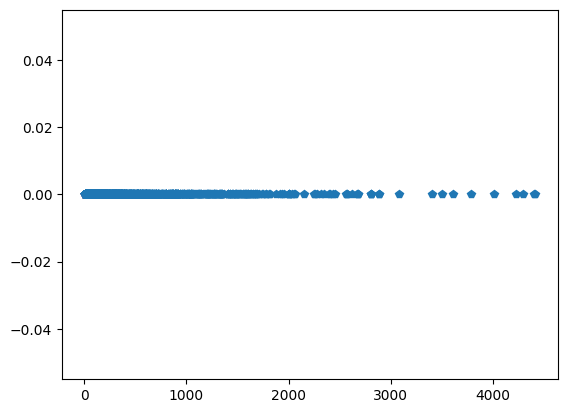

In [ ]:
#Plotting a basic 1D scatter plot using numpy! 'p' refers to the pentagon shape of the scatter points!
plt.plot(cat_df['Sales'],np.zeros_like(cat_df['Sales']),'p')
plt.show()

In [ ]:
#Let's display the df where we set Ship Mode equal to First Class.
shipmode_df=df.loc[df['Ship Mode'] == 'First Class']
shipmode_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order_Weekday,Ship_Weekday
35,36,CA-2017-117590,2017-12-08,2017-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,Texas,75080.0,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,4,6
36,37,CA-2017-117590,2017-12-08,2017-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,Texas,75080.0,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.920,4,6
44,45,CA-2017-118255,2017-03-11,2017-03-13,First Class,ON-18715,Odella Nelson,Corporate,United States,Eagan,Minnesota,55122.0,Central,TEC-AC-10000171,Technology,Accessories,Verbatim 25 GB 6x Blu-ray Single Layer Recorda...,45.980,5,0
45,46,CA-2017-118255,2017-03-11,2017-03-13,First Class,ON-18715,Odella Nelson,Corporate,United States,Eagan,Minnesota,55122.0,Central,OFF-BI-10003291,Office Supplies,Binders,Wilson Jones Leather-Like Binders with DublLoc...,17.460,5,0
55,56,CA-2017-111682,2017-06-17,2017-06-18,First Class,TB-21055,Ted Butterfield,Consumer,United States,Troy,New York,12180.0,East,OFF-ST-10000604,Office Supplies,Storage,Home/Office Personal File Carts,208.560,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9725,9726,CA-2018-142293,2018-09-17,2018-09-20,First Class,SC-20380,Shahid Collister,Consumer,United States,Boise,Idaho,83704.0,West,TEC-AC-10001109,Technology,Accessories,Logitech Trackman Marble Mouse,89.970,0,3
9726,9727,CA-2018-167395,2018-12-02,2018-12-04,First Class,KM-16720,Kunst Miller,Consumer,United States,Lowell,Massachusetts,1852.0,East,OFF-AP-10001293,Office Supplies,Appliances,Belkin 8 Outlet Surge Protector,286.860,6,1
9727,9728,CA-2018-167395,2018-12-02,2018-12-04,First Class,KM-16720,Kunst Miller,Consumer,United States,Lowell,Massachusetts,1852.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,979.950,6,1
9728,9729,CA-2018-167395,2018-12-02,2018-12-04,First Class,KM-16720,Kunst Miller,Consumer,United States,Lowell,Massachusetts,1852.0,East,OFF-SU-10001935,Office Supplies,Supplies,Staple remover,4.360,6,1


In [ ]:
#Let's check the most preferred ship mode & print the df wrt column names
ship_count=df['Ship Mode'].value_counts().reset_index()
ship_count.columns=['Shipment Mode', 'Count']
print(ship_count)
#As displayed, Standard Class has maximum count.

    Shipment Mode  Count
0  Standard Class   5859
1    Second Class   1902
2     First Class   1501
3        Same Day    538


<ipython-input-63-eaee2ce7468a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ship_count['Shipment Mode'], y=ship_count['Count'], order=ship_count['Shipment Mode'],palette="deep")


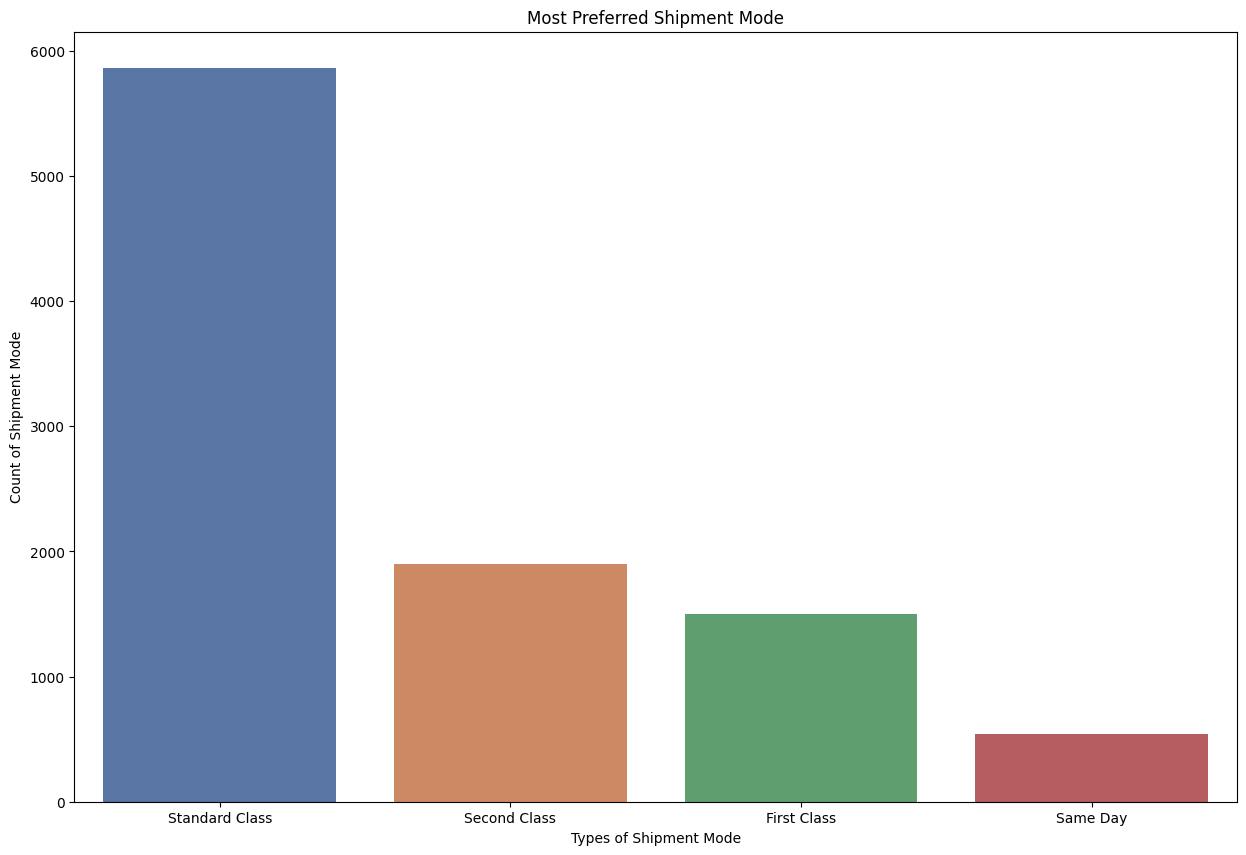

In [ ]:
#Data visualization - Barplot using seaborn for most preferred shipment mode. As displayed, standard class Shipment mode is most preferred followed by Secon Class shipment mode.
plt.figure(figsize=(15,10))
sns.barplot(x=ship_count['Shipment Mode'], y=ship_count['Count'], order=ship_count['Shipment Mode'],palette="deep")
plt.ylabel('Count of Shipment Mode', fontsize=10)
plt.xlabel('Types of Shipment Mode', fontsize=10)
plt.title('Most Preferred Shipment Mode')
plt.show()

In [ ]:
#Let's figure out the most peferred segment
seg_count=df['Segment'].value_counts()
print(seg_count)

Segment
Consumer       5101
Corporate      2953
Home Office    1746
Name: count, dtype: int64


<ipython-input-65-4f8fca266a5b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Segment'], order=seg_count.index,palette="magma")


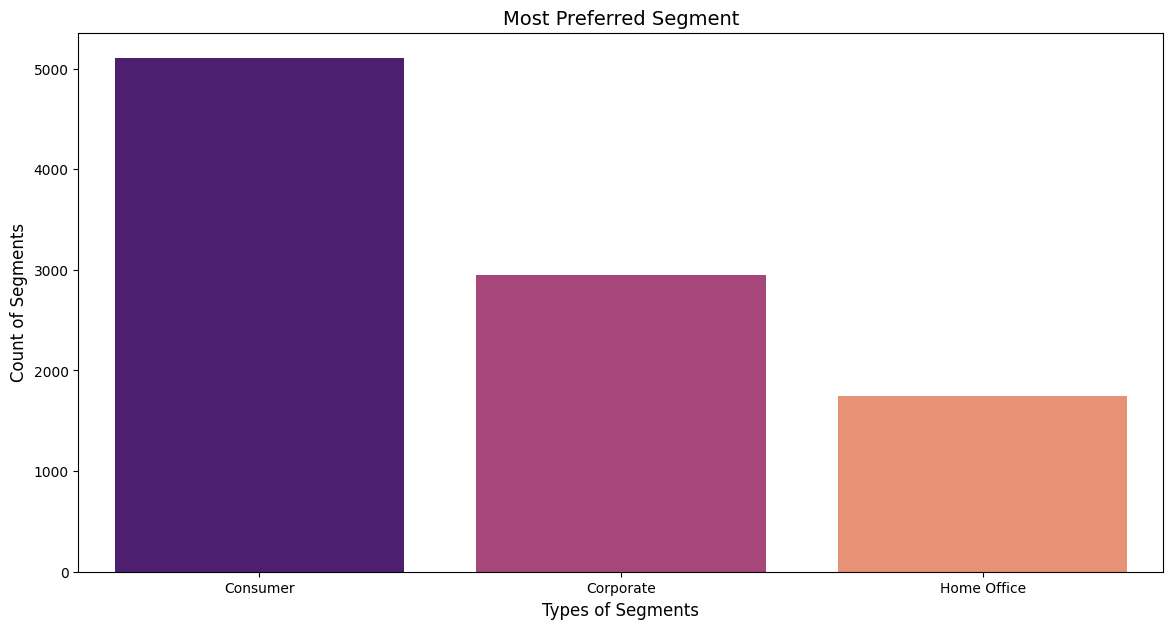

In [ ]:
#Creating a countplot using seaborn for visualizing the most preferred segment. As displayed, Consumer Segment has maximum count followed by Corporate.
plt.figure(figsize=(14,7))
sns.countplot(x=df['Segment'], order=seg_count.index,palette="magma")
plt.ylabel('Count of Segments', fontsize=12)
plt.xlabel('Types of Segments', fontsize=12)
plt.title('Most Preferred Segment', fontsize=14)
plt.show()

In [ ]:
#Let's create a df for checking the count of Region column
region_df=df['Region'].value_counts().reset_index()
region_df.columns=['Region', 'Count']
region_df

,Region,Count
0,West,3140
1,East,2785
2,Central,2277
3,South,1598


<ipython-input-67-57ee253d9e5a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_df['Region'], y=region_df['Count'], order=region_df['Region'],palette="bright")


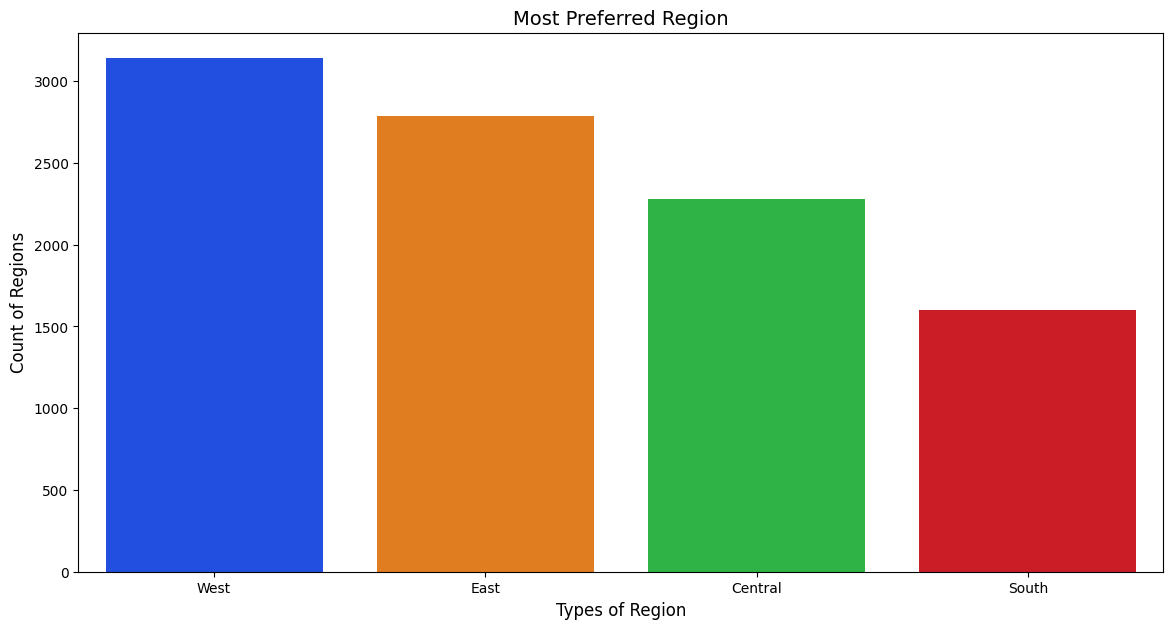

In [ ]:
#Creating a barplot using seaborn where West region clearly leads closely followed by East and then Central Regions.
plt.figure(figsize=(14,7))
sns.barplot(x=region_df['Region'], y=region_df['Count'], order=region_df['Region'],palette="bright")
plt.ylabel('Count of Regions', fontsize=12)
plt.xlabel('Types of Region', fontsize=12)
plt.title('Most Preferred Region', fontsize=14)
plt.show()

In [ ]:
#Let's check out the df for count of sub categories!
subcategories_df=df['Sub-Category'].value_counts().reset_index()
subcategories_df.columns=['Sub-Category', 'Count']
subcategories_df

,Sub-Category,Count
0,Binders,1492
1,Paper,1338
2,Furnishings,931
3,Phones,876
4,Storage,832
5,Art,785
6,Accessories,756
7,Chairs,607
8,Appliances,459
9,Labels,357


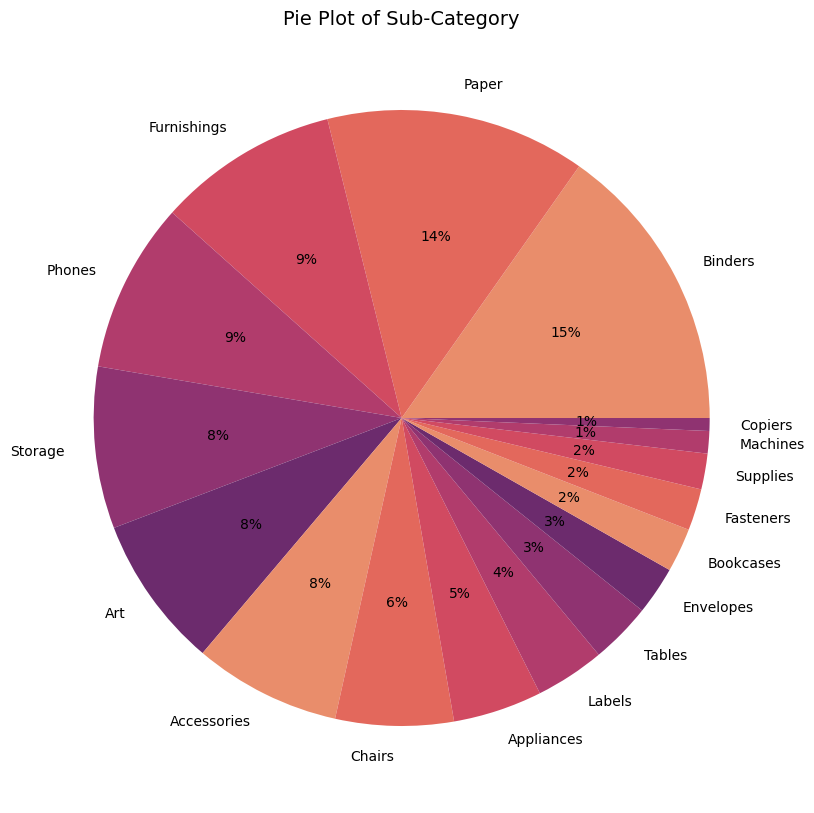

In [ ]:
#Visualising the above df using pie plot in seaborn wherein Binders sub category is leading, closely followed by Paper while Copiers is the least subcategory with lowest value.
plt.figure(figsize=(14,10))
sns.set_palette("flare")
plt.pie(data=subcategories_df, x='Count', labels='Sub-Category', autopct='%1.0f%%')
plt.title('Pie Plot of Sub-Category', fontsize=14)
plt.show()

<ipython-input-70-ab18d3fef24d>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Postal Code'])


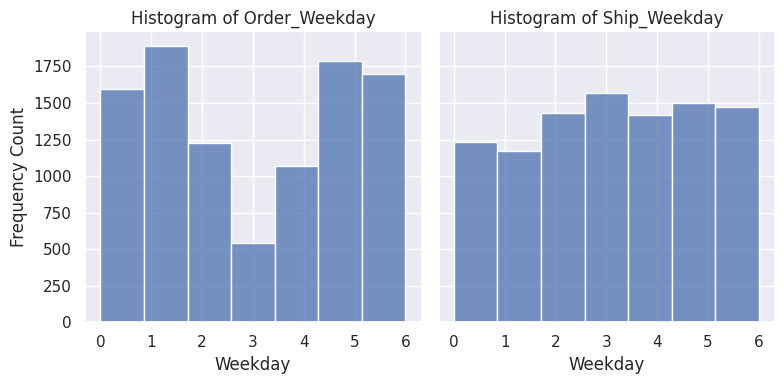

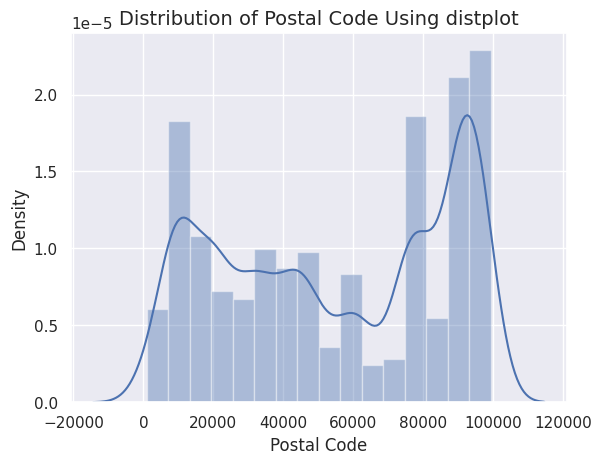

In [ ]:
#Creating histograms & distplot using seaborn for univariate, independent variables.
#setting the bg style to darkgridlines
sns.set(style="darkgrid")

# Melt the DataFrame for better FacetGrid usage to incorporate both columns
df_histograms = pd.melt(df[['Order_Weekday', 'Ship_Weekday']], var_name='variable', value_name='value')

# Creating a FacetGrid with two subplots s.t our histograms appear side by side!
h = sns.FacetGrid(df_histograms, col="variable", col_wrap=2, height=4)
h.map(sns.histplot, "value", bins=7)
h.set_axis_labels("Weekday", "Frequency Count")
h.set_titles("Histogram of {col_name}")
#Creating the distplot for Postal code column
plt.figure(2)
sns.distplot(df['Postal Code'])
plt.xlabel('Postal Code', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Distribution of Postal Code Using distplot', fontsize=14)
plt.show()

#as displayed, for Order_Weekday, Tuesday is in the lead while for Ship_Weekday histogram, Thursday is leading.

# **#BiVariate & MultiVariate Analysis**

---



In [ ]:
#Let's display a df with Category data & cooresponding entries as mean of Sales value
sales_df=df.groupby('Category')['Sales'].mean().reset_index()
sales_df

,Category,Sales
0,Furniture,350.653790
1,Office Supplies,119.381001
2,Technology,456.401474


<ipython-input-72-3b446657ae6e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_df['Category'], y=sales_df['Sales'], order=sales_df['Category'],palette="icefire")


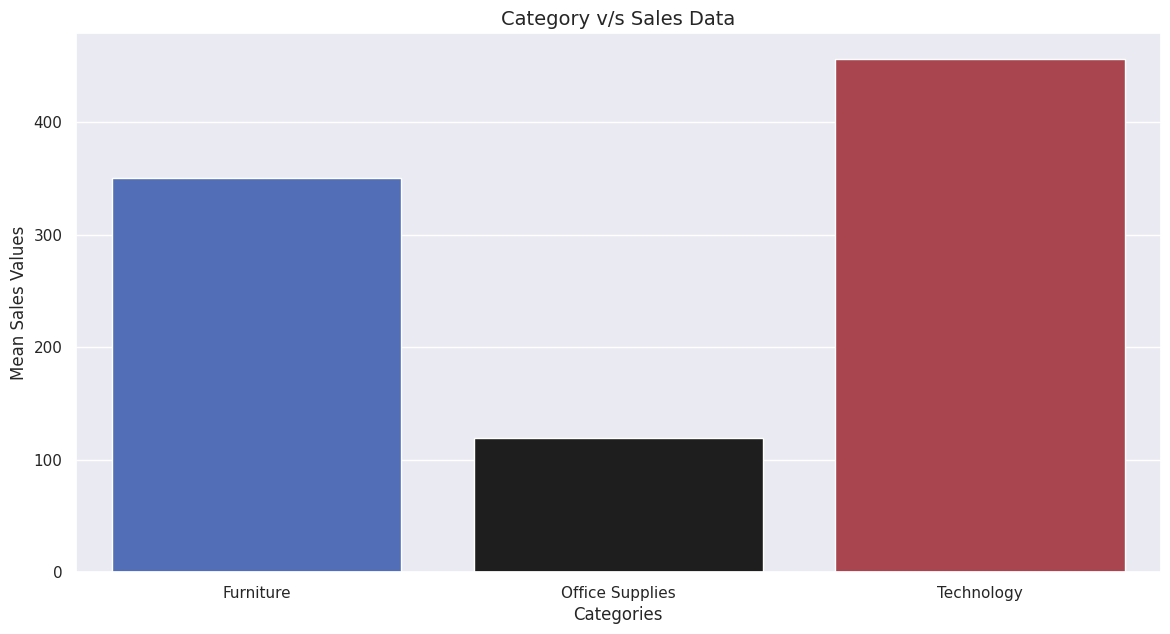

In [ ]:
#Plotting a barplot in seaborn for displaying the category v/s mean of sales data.As we can see, Technology Category has the highest mean of Sales value whereas Office Supplies has the lowest value.
plt.figure(figsize=(14,7))
sns.set_style("darkgrid")
sns.barplot(x=sales_df['Category'], y=sales_df['Sales'], order=sales_df['Category'],palette="icefire")
plt.ylabel('Mean Sales Values',fontsize=12)
plt.xlabel('Categories', fontsize=12)
plt.title('Category v/s Sales Data', fontsize=14)
plt.show()

In [ ]:
#Let's display a df with Region data & cooresponding entries as mean of Sales value
region_df=df.groupby('Region')['Sales'].mean().reset_index()
region_df

,Region,Sales
0,Central,216.357889
1,East,240.401697
2,South,243.524067
3,West,226.184613


<ipython-input-74-ce327574ac60>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_df['Region'], y=region_df['Sales'], order=region_df['Region'],palette="deep")


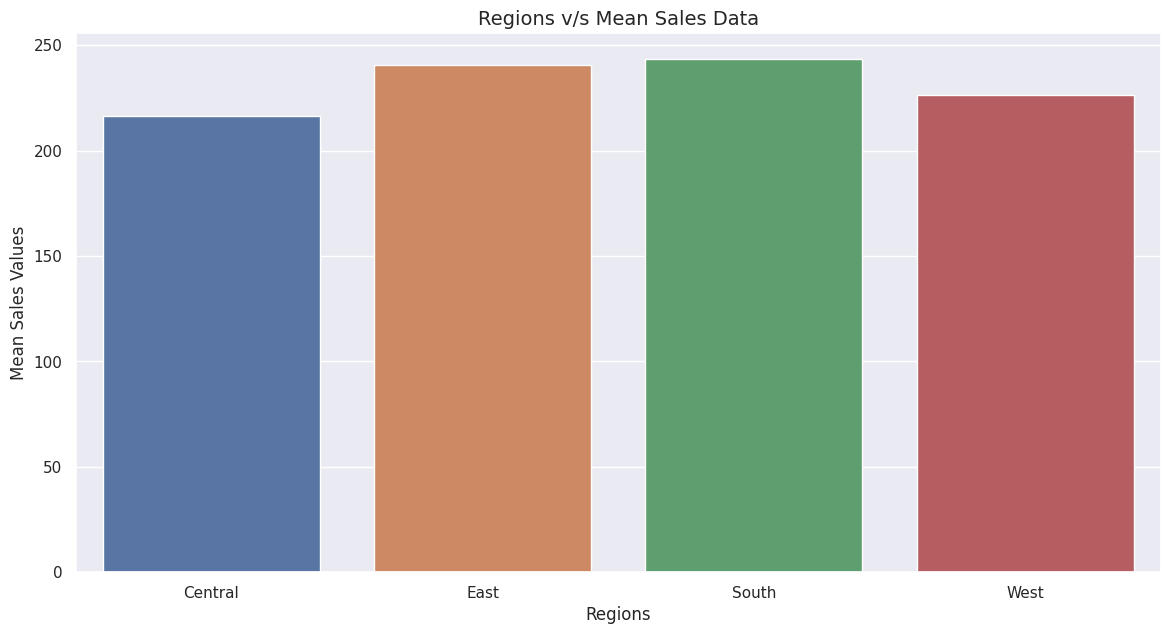

In [ ]:
#Plotting a barplot in seaborn for displaying the region v/s mean of sales data.As we can see, South and East Regions are among the top whereas Central region has the lowest Sales.
plt.figure(figsize=(14,7))
sns.set_style("darkgrid")
sns.barplot(x=region_df['Region'], y=region_df['Sales'], order=region_df['Region'],palette="deep")
plt.ylabel('Mean Sales Values', fontsize=12)
plt.xlabel('Regions', fontsize=12)
plt.title('Regions v/s Mean Sales Data', fontsize=14)
plt.show()

In [ ]:
#Here we are displaying the top 10 states where sales are highest in descending order.

high_salesdf = df.groupby('State')['Sales'].sum().reset_index()
top_10_states = high_salesdf.sort_values(by='Sales', ascending=False)
top_10_states.head(10)

,State,Sales
3,California,446306.4635
30,New York,306361.1470
41,Texas,168572.5322
45,Washington,135206.8500
36,Pennsylvania,116276.6500
8,Florida,88436.5320
11,Illinois,79236.5170
20,Michigan,76136.0740
33,Ohio,75130.3500
44,Virginia,70636.7200


<ipython-input-76-1942e509a916>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_states.head(10)['Sales'], y=top_10_states.head(10)['State'], data=top_10_states.head(10), palette="cubehelix", orient='h')


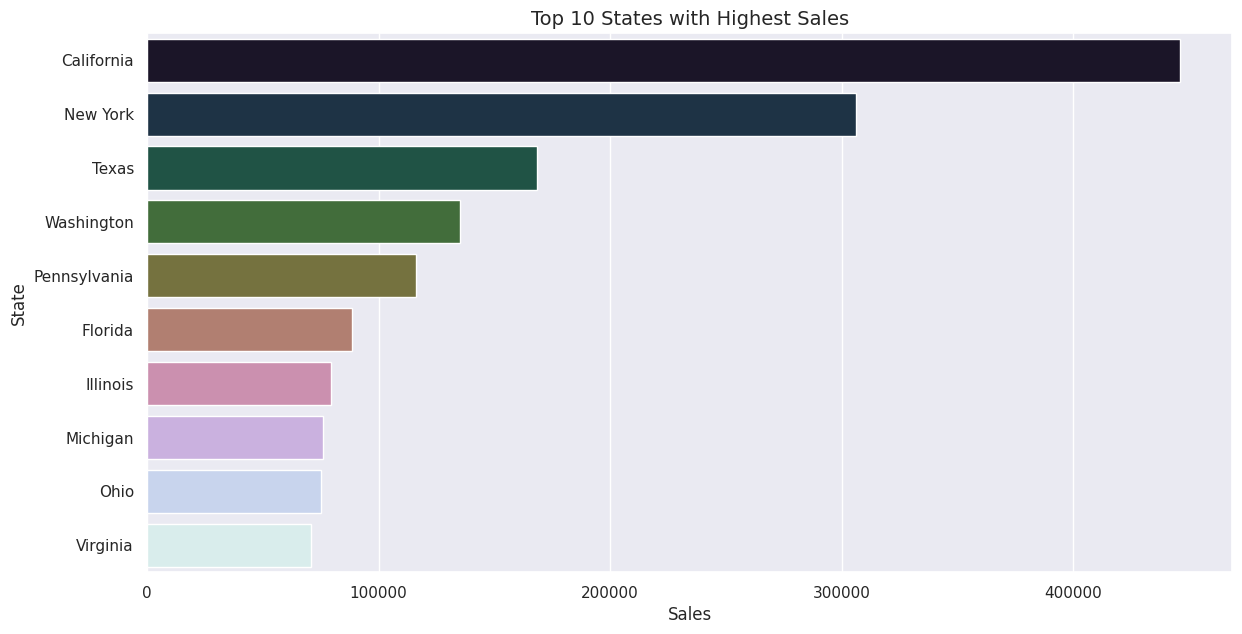

In [ ]:
#Plotting a horizontal barplot in seaborn to visualise the data for top 10 States! California is way ahead of other states wrt Sales!
plt.figure(figsize=(14, 7))
sns.barplot(x=top_10_states.head(10)['Sales'], y=top_10_states.head(10)['State'], data=top_10_states.head(10), palette="cubehelix", orient='h')
# Use orient='h' for horizontal bars
plt.xlabel('Sales', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.title('Top 10 States with Highest Sales', fontsize=14)
plt.show()

In [ ]:
#Here we are printing the last 5 subcategories with lowest sales. the Sales column is rounded off to 1 decimal place.
subcat_sales_df=df.groupby('Sub-Category')['Sales'].mean().reset_index()
subcat_sales_df
subcat_sales_df['Sales'] = subcat_sales_df['Sales'].round(1)
bottom_5_subcategories = subcat_sales_df.sort_values(by='Sales')
bottom_5_subcategories.head(5)

,Sub-Category,Sales
8,Fasteners,14.0
2,Art,34.0
10,Labels,34.6
12,Paper,57.4
7,Envelopes,65.0


<ipython-input-78-77cd8eef7233>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_5_subcategories.head(5)['Sales'], y=bottom_5_subcategories.head(5)['Sub-Category'], data=bottom_5_subcategories.head(5), palette="dark", orient='h')


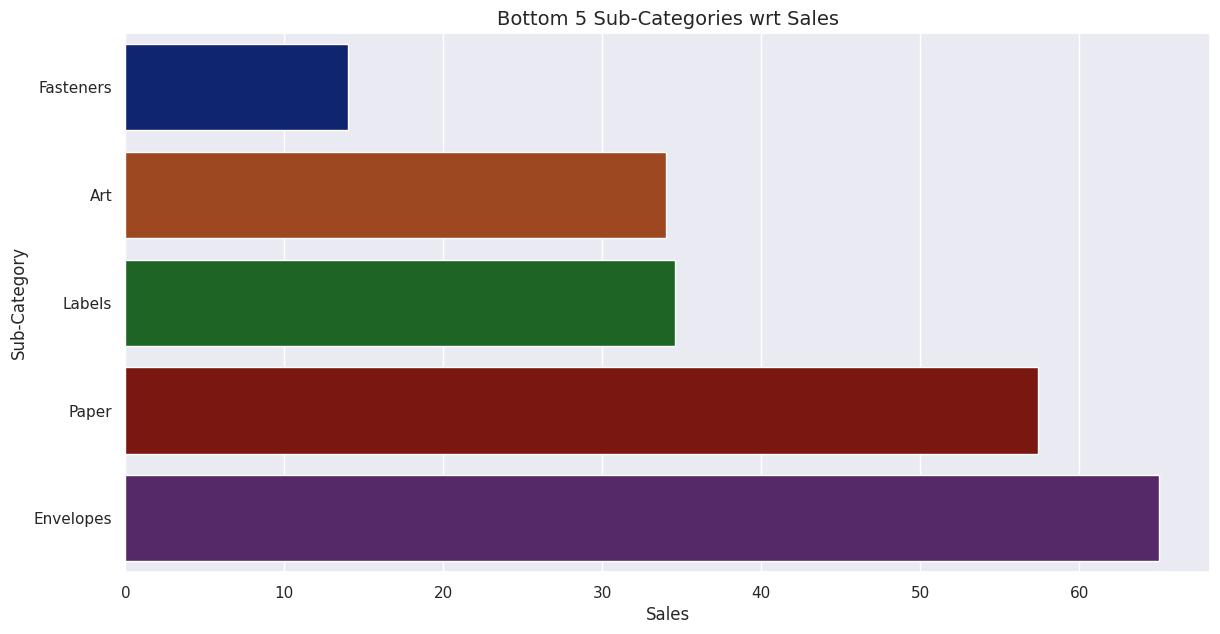

In [ ]:
#Plotting a horizontal barplot in seaborn to visualise the data for bottom 5 subcategories! Fasteners clearly have the lowst sales followed by Art!
plt.figure(figsize=(14, 7))
sns.barplot(x=bottom_5_subcategories.head(5)['Sales'], y=bottom_5_subcategories.head(5)['Sub-Category'], data=bottom_5_subcategories.head(5), palette="dark", orient='h')
# Use orient='h' for horizontal bars
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Sub-Category', fontsize=12)
plt.title('Bottom 5 Sub-Categories wrt Sales', fontsize=14)
plt.show()

In [ ]:
#Let's further explore our data. Here i am creating a df wherein the Order_weekly & Ship_Weekly columns are equal to Mondays.
mondayData_df=df.loc[(df['Order_Weekday'] == 0) & (df['Ship_Weekday'] == 0)]
mondayData_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order_Weekday,Ship_Weekday
126,127,US-2018-107272,2018-11-05,2018-11-12,Standard Class,TS-21610,Troy Staebel,Consumer,United States,Phoenix,Arizona,85023.0,West,OFF-BI-10003274,Office Supplies,Binders,"Avery Durable Slant Ring Binders, No Labels",2.388,0,0
127,128,US-2018-107272,2018-11-05,2018-11-12,Standard Class,TS-21610,Troy Staebel,Consumer,United States,Phoenix,Arizona,85023.0,West,OFF-ST-10002974,Office Supplies,Storage,"Trav-L-File Heavy-Duty Shuttle II, Black",243.992,0,0
428,429,CA-2018-152275,2018-10-01,2018-10-08,Standard Class,KH-16630,Ken Heidel,Corporate,United States,San Antonio,Texas,78207.0,Central,OFF-AR-10000369,Office Supplies,Art,Design Ebony Sketching Pencil,6.672,0,0
525,526,CA-2016-158792,2016-12-26,2017-01-02,Standard Class,BD-11605,Brian Dahlen,Consumer,United States,Lawrence,Massachusetts,1841.0,East,OFF-FA-10002815,Office Supplies,Fasteners,Staples,22.200,0,0
566,567,CA-2018-156951,2018-10-01,2018-10-08,Standard Class,EB-13840,Ellis Ballard,Corporate,United States,Seattle,Washington,98105.0,West,OFF-PA-10004530,Office Supplies,Paper,Personal Creations Ink Jet Cards and Labels,91.840,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9478,9479,CA-2015-126193,2015-09-07,2015-09-14,Standard Class,SS-20410,Shahid Shariari,Consumer,United States,Oswego,Illinois,60543.0,Central,OFF-FA-10000936,Office Supplies,Fasteners,Acco Hot Clips Clips to Go,13.160,0,0
9479,9480,CA-2015-126193,2015-09-07,2015-09-14,Standard Class,SS-20410,Shahid Shariari,Consumer,United States,Oswego,Illinois,60543.0,Central,OFF-BI-10001249,Office Supplies,Binders,Avery Heavy-Duty EZD View Binder with Locking ...,3.828,0,0
9480,9481,CA-2015-126193,2015-09-07,2015-09-14,Standard Class,SS-20410,Shahid Shariari,Consumer,United States,Oswego,Illinois,60543.0,Central,OFF-BI-10004632,Office Supplies,Binders,Ibico Hi-Tech Manual Binding System,304.990,0,0
9772,9773,CA-2017-104983,2017-07-03,2017-07-03,Same Day,FM-14215,Filia McAdams,Corporate,United States,Philadelphia,Pennsylvania,19143.0,East,OFF-PA-10000167,Office Supplies,Paper,Xerox 1925,123.920,0,0


<ipython-input-80-d83221d4e8fc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Sales', data=mondayData_df, palette='viridis')


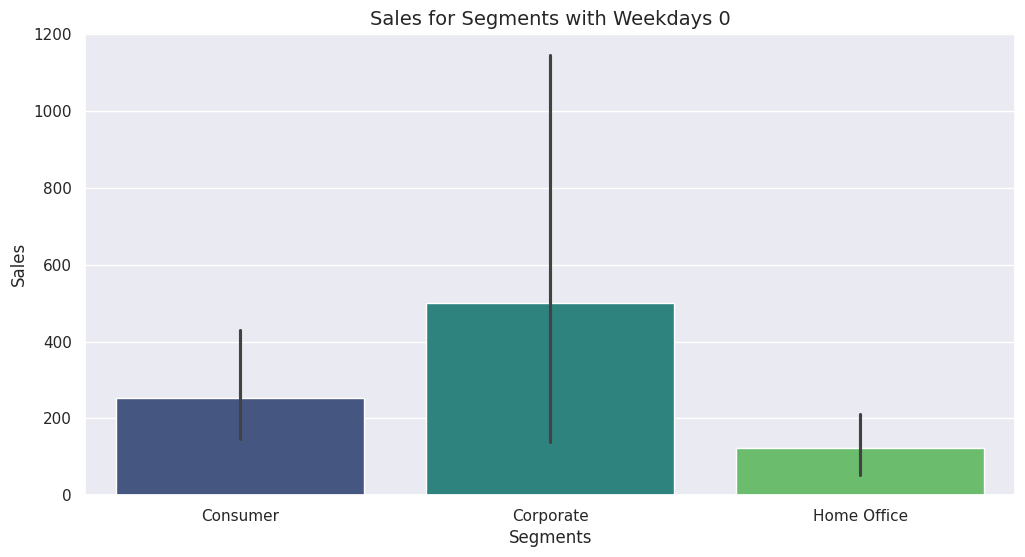

In [ ]:
#Visualising further  with a barplot showcasing Sales for Segments when Orders are placed & Orders are Shipped on Monday
plt.figure(figsize=(12, 6))
sns.barplot(x='Segment', y='Sales', data=mondayData_df, palette='viridis')
plt.xlabel('Segments', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title('Sales for Segments with Weekdays 0', fontsize=14)
plt.show()

In [ ]:
#This has made me further curious! here i am creating df wherein orders are shipped on Sunday!
Shipped_sunday_Data_df=df.loc[(df['Ship_Weekday'] == 6)]
Shipped_sunday_Data_df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order_Weekday,Ship_Weekday
5,6,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,1,6
6,7,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,1,6
7,8,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,1,6
8,9,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,1,6
9,10,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798,6,6
9796,9797,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368,1,6
9797,9798,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188,1,6
9798,9799,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376,1,6


<ipython-input-82-f028901587fb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Sales', data=Shipped_sunday_Data_df, palette='flare')


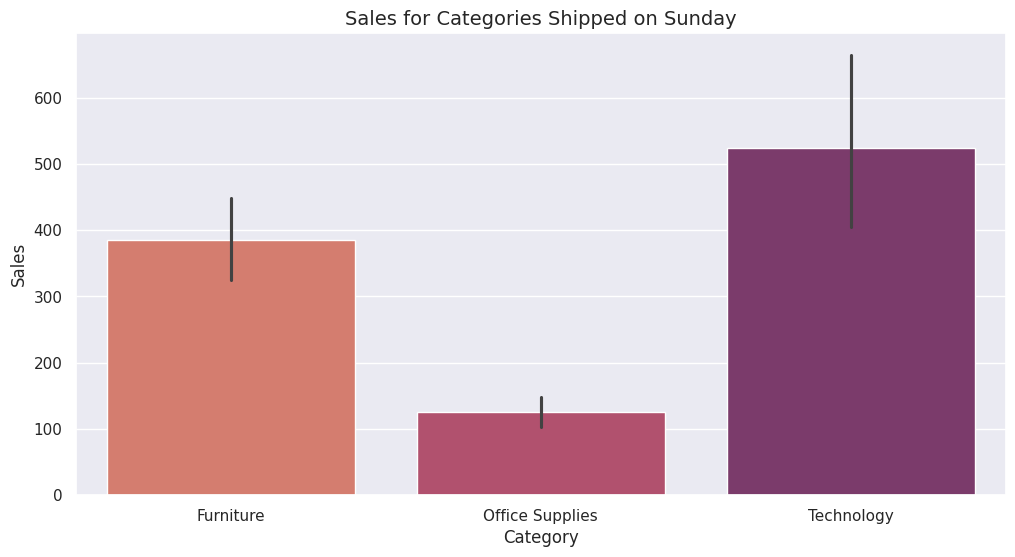

In [ ]:
##Visualising further  with a barplot showcasing Sales for Categories when  Orders are Shipped on Sunday! Looks like orders related to Technology Category were shipped the most on Sundays.
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Sales', data=Shipped_sunday_Data_df, palette='flare')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title('Sales for Categories Shipped on Sunday', fontsize=14)
plt.show()

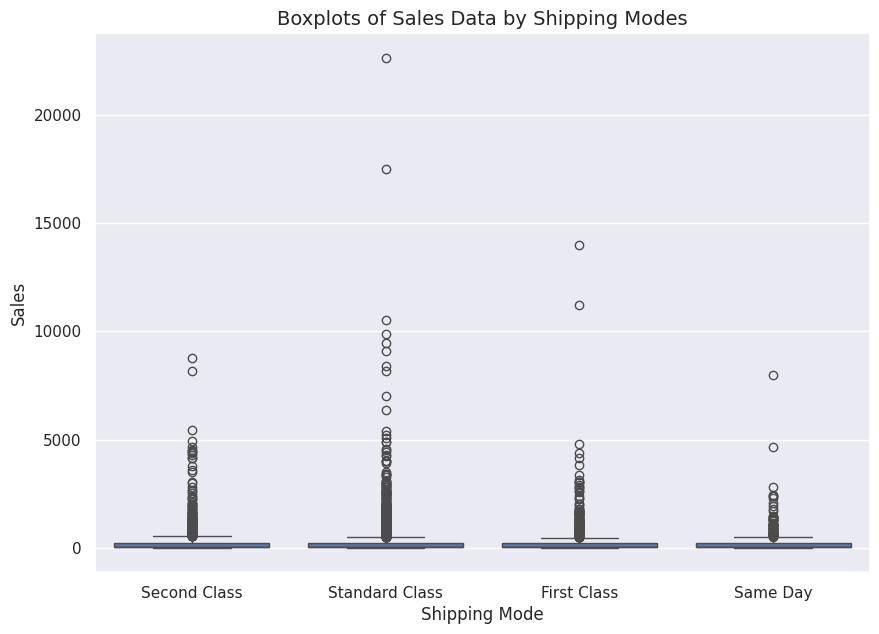

In [ ]:
#Let's create boxplots for various data ponts! Plotting a boxplot for Sales wrt Shipping modes. Clearly, Standard class mode has way more outliers than other modes!
plt.figure(figsize=(10, 7))
sns.boxplot(x='Ship Mode', y='Sales', data = df)
plt.xlabel('Shipping Mode', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title('Boxplots of Sales Data by Shipping Modes', fontsize=14)
plt.show()

<ipython-input-84-5ffc64540673>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Sales', data = df, palette="dark")


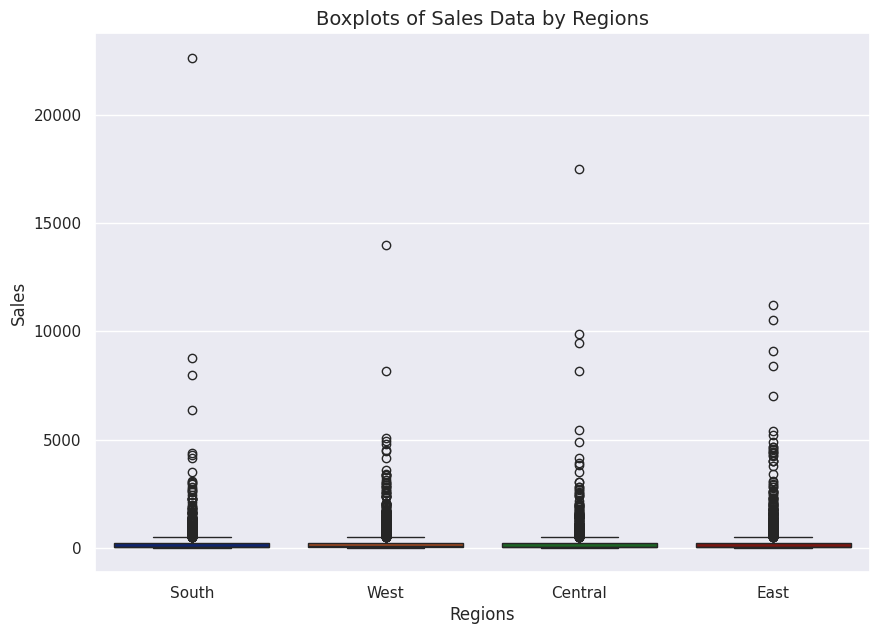

In [ ]:
#Plotting a boxplot of Sales wrt Regions!There are just a few outliers - south region has 1 in particular.
plt.figure(figsize=(10, 7))
sns.boxplot(x='Region', y='Sales', data = df, palette="dark")
plt.xlabel('Regions', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title('Boxplots of Sales Data by Regions', fontsize=14)
plt.show()

<ipython-input-85-6e8aa51e7d8f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sales', y='Category', data = df, vert=False, showfliers=False, palette="icefire") #vert=False is used for horizontal boxplot. showfliers=False doesn't display the outliers.


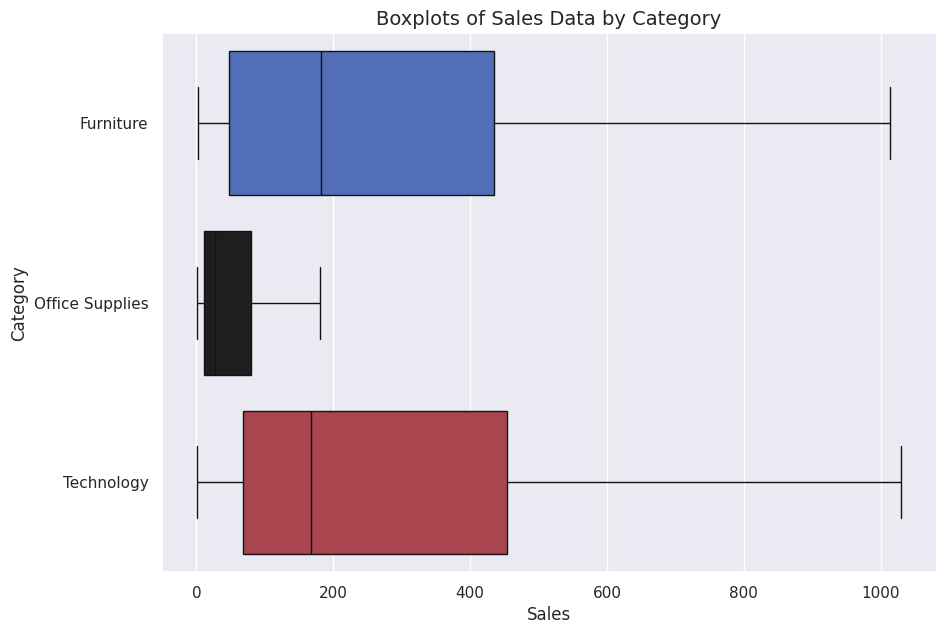

In [ ]:
#One last boxplot but with a twist. Plotting a horizontal boxplot and let's not display the outliers this time!
plt.figure(figsize=(10, 7))
sns.boxplot(x='Sales', y='Category', data = df, vert=False, showfliers=False, palette="icefire") #vert=False is used for horizontal boxplot. showfliers=False doesn't display the outliers.
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.title('Boxplots of Sales Data by Category', fontsize=14)
plt.show()

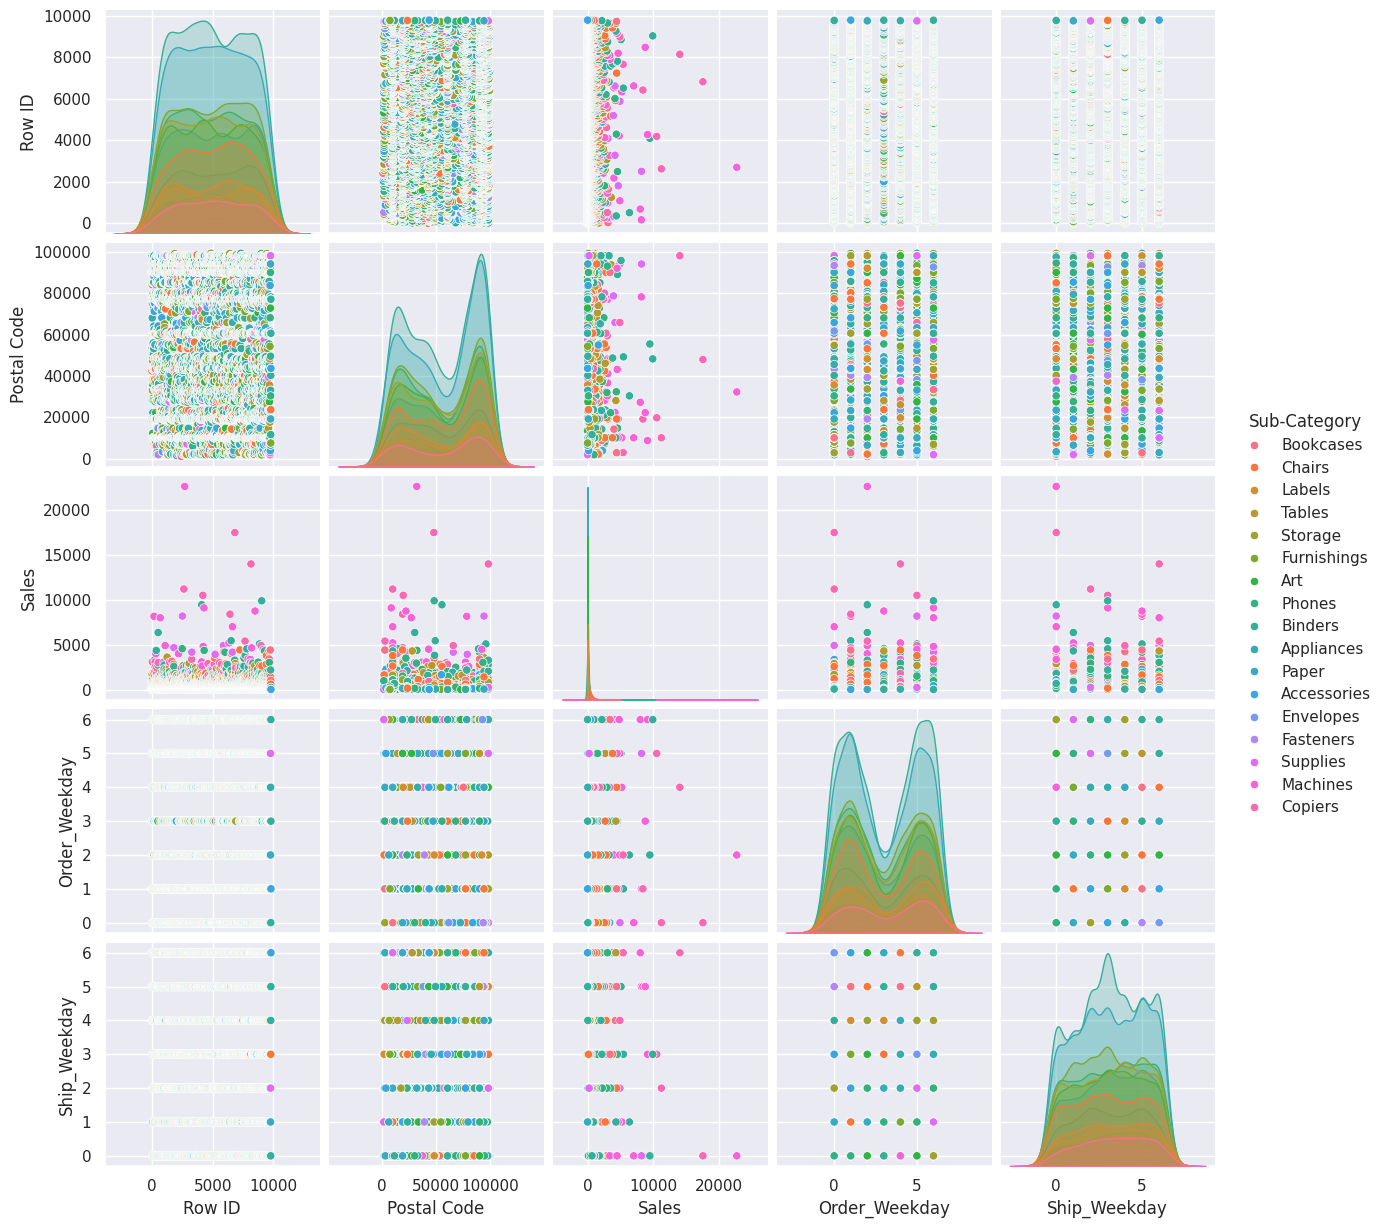

In [ ]:
#A pair plot is an amazing visualization for comapring value wrt each column. Here we are displaying a pair plot of subcategory wrt each column in the dataset!
#Gives a great view on scatter plots & distplots!
sns.pairplot(df, hue='Sub-Category')

Text(0.5, 1.0, 'Time Series Plot of Sales wrt Order Dates')

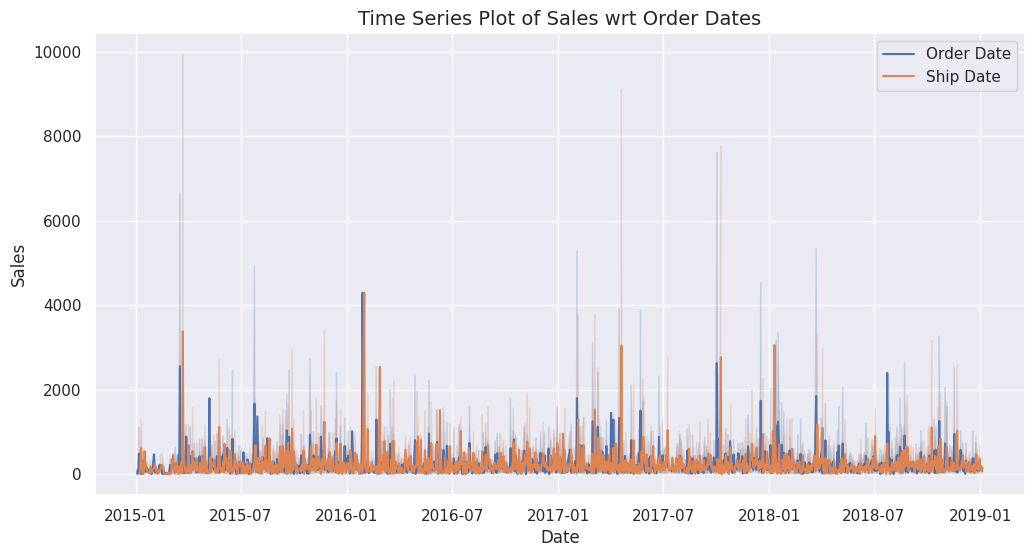

In [ ]:
#Let's complete this visualization with a time series graph. A time series graph shows how variables change over a period of time. Here we are trying to visualise
#the change in Sales wrt chnge in Order Date & Ship Date.
plt.figure(figsize=(12, 6))
# Using Seaborn's lineplot to plot the time series of Sales
sns.lineplot(x='Order Date', y='Sales', data=df, label='Order Date')
sns.lineplot(x='Ship Date', y='Sales', data=df, label='Ship Date')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title('Time Series Plot of Sales wrt Order Dates', fontsize=14)

#*CONCLUSION --*#

# With this we come to the end of our Exploratory Data Analysis! EDA ia an extensive process which involves digging deeper into the dataset and exploring hidden data which will help us analyze our results based on independent and dependent variables in an informed manner and gain better insight into the data via various methods of analysis. EDA involved visualizations which help decipher the meaning of data and communicate our results to the user smoothly. Visualisations help in indentifying patterns and trends presnt in the dataset which can further aid in hypothesis generation - it is a form of interactive exploration!